## Problemática y Objetivo

En esta tarea, queremos evaluar qué empleados tienen una mayor probabilidad de quedarse en la empresa en función de su `Stay_Score`. Este puntaje es calculado a partir de dos características: la edad y el salario de los empleados. Usaremos un modelo de Support Vector Machine (SVM) para categorizar a los empleados como aquellos con alta probabilidad de quedarse (`1`) o baja probabilidad de quedarse (`0`), basándonos en si su `Stay_Score` supera un umbral de 0.6.

## Preparación de Datos

1. **Creación de Etiquetas**:
   - Se crea una nueva columna `Stay_Probability` en el DataFrame `df`. Esta columna contiene `1` si el `Stay_Score` es mayor a 0.6, y `0` en caso contrario.

2. **Selección de Características y Variable Objetivo**:
   - **Características**: `Age_Normalized` y `Salary_Normalized`.
   - **Variable Objetivo**: `Stay_Probability`.

## Dividir los Datos

Se dividen los datos en conjuntos de entrenamiento y prueba para evaluar la efectividad del modelo. El tamaño del conjunto de prueba es del 20%.

## Transformación Polinómica

Se aplican características polinómicas de grado 2 para capturar relaciones no lineales entre `Age_Normalized` y `Salary_Normalized`.

## Entrenamiento del Modelo

Se ajusta un modelo de Support Vector Machine (SVM) con un kernel lineal. Puedes experimentar con otros kernels como 'rbf' para obtener resultados diferentes.

## Evaluación del Modelo

Se evalúa el modelo usando precisión y un reporte de clasificación que incluye precisión, recall y F1-score. Estas métricas ayudarán a entender cómo de bien el modelo clasifica a los empleados según su probabilidad de quedarse.

## Visualización

Se visualiza la distribución de los empleados según la probabilidad de permanencia usando un gráfico de dispersión. Este gráfico muestra cómo se agrupan los empleados en función de sus características normalizadas.


In [1]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install openpyxl

## Generar 5 000 combinaciones de nombres y apellidos aleatorios para tener data suficinte, no importa si se repiten (el punto es tener data)

In [2]:
import pandas as pd
import numpy as np
# Lista base de nombres
base_names = np.array(["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ian", "Jane",
                       "Kevin", "Laura", "Mike", "Nina", "Oscar", "Paula", "Quincy", "Rita", "Sam", "Tina",
                       "Uma", "Victor", "Wendy", "Xander", "Yara", "Zoe"])

# Generar un array gigante con 100,000 nombres aleatorios
giant_names_array = np.random.choice(base_names, size = 5000)

# Crear un array de apellidos más largo
base_last_names = np.array([
    'Smith', 'Johnson', 'Williams', 'Jones', 'Brown',
    'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor',
    'Anderson', 'Thomas', 'Jackson', 'White', 'Harris',
    'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robinson',
    'Clark', 'Rodriguez', 'Lewis', 'Lee', 'Walker',
    'Hall', 'Allen', 'Young', 'King', 'Wright',
    'Scott', 'Torres', 'Nguyen', 'Hill', 'Adams',
    'Baker', 'Gonzalez', 'Nelson', 'Carter', 'Mitchell',
    'Perez', 'Roberts', 'Turner', 'Phillips', 'Campbell',
    'Parker', 'Evans', 'Edwards', 'Collins', 'Stewart',
    'Sanchez', 'Morris', 'Rogers', 'Reed', 'Cook',
    'Morgan', 'Bell', 'Murphy', 'Bailey', 'Rivera',
    'Cooper', 'Richardson', 'Cox', 'Howard', 'Ward',
    'Flores', 'Butler', 'Simmons', 'Foster', 'Gonzales',
    'Bryant', 'Alexander', 'Russell', 'Griffin', 'Diaz'
])

# Rellenar un array de 100,000 registros con apellidos aleatorios
giant_last_name_array = np.random.choice(base_last_names, size = 5000, replace = True)

        ID    Name  Last Name  Age   Salary  Stay_Score
0        1   David   Phillips   24   731164    0.541725
1        2  Quincy      Davis   27   997902    0.652344
2        3     Uma  Rodriguez   57   891522    0.311118
3        4   Oscar   Anderson   55   756368    0.259639
4        5    Rita     Butler   26  1344316    0.842635
...    ...     ...        ...  ...      ...         ...
4995  4996     Zoe     Howard   31   503747    0.356386
4996  4997   Frank      White   26  1052783    0.690506
4997  4998     Uma     Martin   40  1192249    0.629950
4998  4999     Ian      Perez   23   553070    0.458315
4999  5000   Paula      Baker   57   418893    0.064488

[5000 rows x 6 columns]


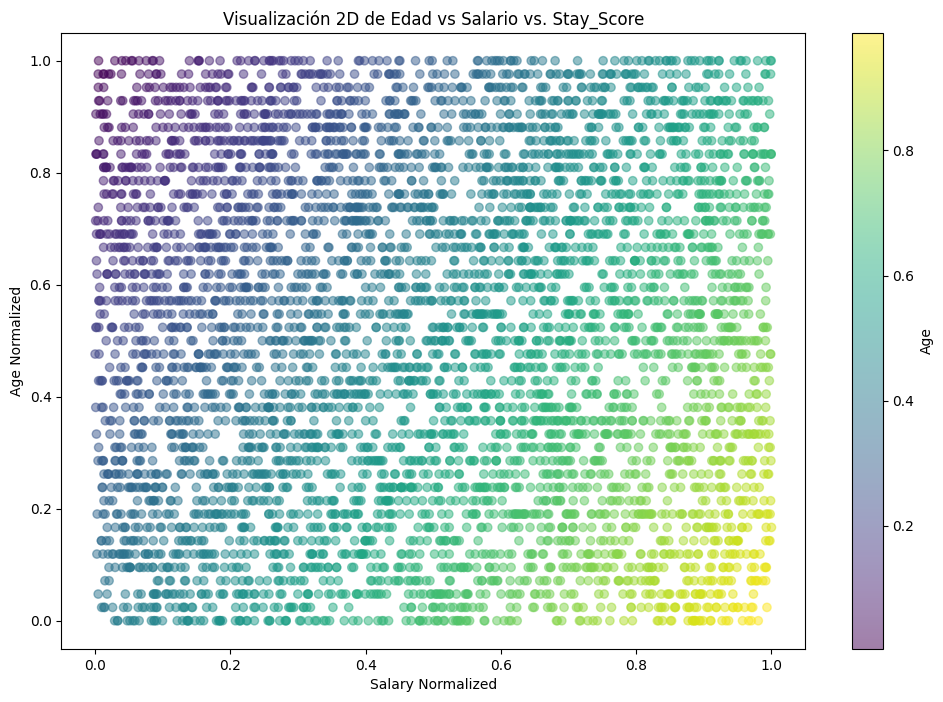

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear DataFrame (como ejemplo)
# Generamos 100 registros para simular un conjunto de datos grande
data = {
    'ID': np.arange(1, 5001),  # Generamos IDs únicos del 1 al 100
    'Name': giant_names_array,  # Nombres aleatorios
    'Last Name': giant_last_name_array,  # Apellidos aleatorios
    'Age': np.random.randint(18, 61, size = 5000),  # Edades aleatorias entre 18 y 60 años
    'Salary': np.random.randint(350000, 1500001, size = 5000)  # Salarios aleatorios entre $350.000 y $1.500.000
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Normalización de datos
scaler = MinMaxScaler()

# Aplicamos MinMaxScaler a las columnas 'Age' y 'Salary'
df[['Age_Normalized', 'Salary_Normalized']] = scaler.fit_transform(df[['Age', 'Salary']])

# Crear una nueva columna 'Stay_Score'
df['Stay_Score'] = 0.4 * (1 - df['Age_Normalized']) + 0.6 * df['Salary_Normalized']

# Mostrar los datos preprocesados
print(df[['ID', 'Name', 'Last Name', 'Age', 'Salary', 'Stay_Score']])

# Crear la figura para ver retención por edad
plt.figure(figsize = (12, 8))

# Graficar 'Age' vs vs 'Salary Normalized' 'Stay_Score'
scatter = plt.scatter(df['Salary_Normalized'], df['Age_Normalized'], c = df['Stay_Score'], cmap = 'viridis', alpha = 0.5)
plt.colorbar(scatter, label='Age')
plt.xlabel('Salary Normalized')
plt.ylabel('Age Normalized')
plt.title('Visualización 2D de Edad vs Salario vs. Stay_Score')
plt.show()



## Uso de Máquinas de Vectores de Soporte (SVM) para Predicción de Probabilidad de Permanencia

### ¿Por qué usar SVM?

Las **Máquinas de Vectores de Soporte (SVM)** son una técnica poderosa para problemas de clasificación, que también se pueden adaptar para estimar probabilidades. Aquí explicamos por qué elegimos SVM para este análisis:

1. **Capacidad para Manejar Datos No Lineales**:
   - Aunque los datos pueden no tener una separación lineal clara, SVM puede manejar datos no lineales mediante la transformación a un espacio de características de mayor dimensión utilizando un kernel polinómico. Esto permite al modelo capturar complejas relaciones entre `Edad` y `Salario` que podrían no ser lineales.

2. **Clasificación Binaria**:
   - En este caso, estamos interesados en clasificar a los empleados en dos categorías: aquellos con una alta probabilidad de quedarse (`Stay_Probability = 1`) y aquellos con una baja probabilidad de quedarse (`Stay_Probability = 0`). SVM es adecuado para clasificación binaria y proporciona un margen máximo entre las dos clases.

3. **Estimación de Probabilidades**:
   - Usamos la opción `probability=True` en el modelo SVM para obtener estimaciones probabilísticas. Esto nos permite predecir la probabilidad de que un empleado se quede en la empresa, basándonos en sus características. Aunque SVM por defecto no proporciona probabilidades, al habilitar `probability=True`, se realiza una calibración adicional para obtener estimaciones de probabilidad.

4. **Flexibilidad en el Kernel**:
   - SVM permite la elección de diferentes tipos de kernels (`lineal`, `rbf`, `polinómico`, etc.), lo que ofrece flexibilidad para modelar datos con diferentes estructuras. En este caso, utilizamos un kernel polinómico para capturar relaciones no lineales entre `Edad` y `Salario`.

5. **Manejo de Datos Altamente Dimensionales**:
   - Si bien en este ejemplo tenemos solo dos características, SVM es eficaz en escenarios con datos de alta dimensión. El uso de características polinómicas también ilustra cómo SVM puede beneficiarse al manejar datos transformados en espacios de mayor dimensión.

### Conclusión

SVM proporciona una metodología robusta y flexible para clasificar y estimar probabilidades en problemas complejos, como predecir la probabilidad de permanencia de los empleados en función de sus características. Su capacidad para manejar datos no lineales y su flexibilidad en la selección del kernel la hacen adecuada para este análisis.


In [4]:
# Importar las librerías necesarias
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear DataFrame de ejemplo (asegúrate de tener el DataFrame df ya definido como en el código anterior)
# df debe tener las columnas 'Age_Normalized', 'Salary_Normalized' y 'Stay_Score'

# Crear la columna de etiquetas para clasificación
df['Stay_Probability'] = (df['Stay_Score'] > 0.6).astype(int)

# Seleccionar características y variable objetivo
X = df[['Age_Normalized', 'Salary_Normalized']]
Y = df['Stay_Probability']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplicar características polinómicas (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Ajustar el modelo SVM con probabilidad habilitada
model = SVC(kernel='linear', probability=True)  # Se usa 'linear' aquí, pero puedes probar con otros kernels
model.fit(X_poly_train, Y_train)

# Predecir probabilidades en el conjunto de prueba
Y_prob = model.predict_proba(X_poly_test)[:, 1]  # Probabilidad de clase positiva

# Evaluar

In [5]:

# Evaluar el modelo
print("Modelo SVM ajustado")
print("Reporte de clasificación:")
print(classification_report(Y_test, model.predict(X_poly_test)))
print("Precisión:", accuracy_score(Y_test, model.predict(X_poly_test)))

# Contar cuántos empleados cumplen la condición y cuántos no
# Utilizamos un umbral de 0.5 para determinar si cumplen la condición
num_cumplen = np.sum(Y_prob > 0.5)
num_no_cumplen = len(Y_prob) - num_cumplen

print("\nNúmero de empleados que cumplen la condición (Stay_Probability = 1):", num_cumplen)
print("Número de empleados que no cumplen la condición (Stay_Probability = 0):", num_no_cumplen)


Modelo SVM ajustado
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       677
           1       1.00      0.98      0.99       323

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Precisión: 0.994

Número de empleados que cumplen la condición (Stay_Probability = 1): 321
Número de empleados que no cumplen la condición (Stay_Probability = 0): 679


# Mostrar Graficos 3D

c:\Users\USUARIO\.conda\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


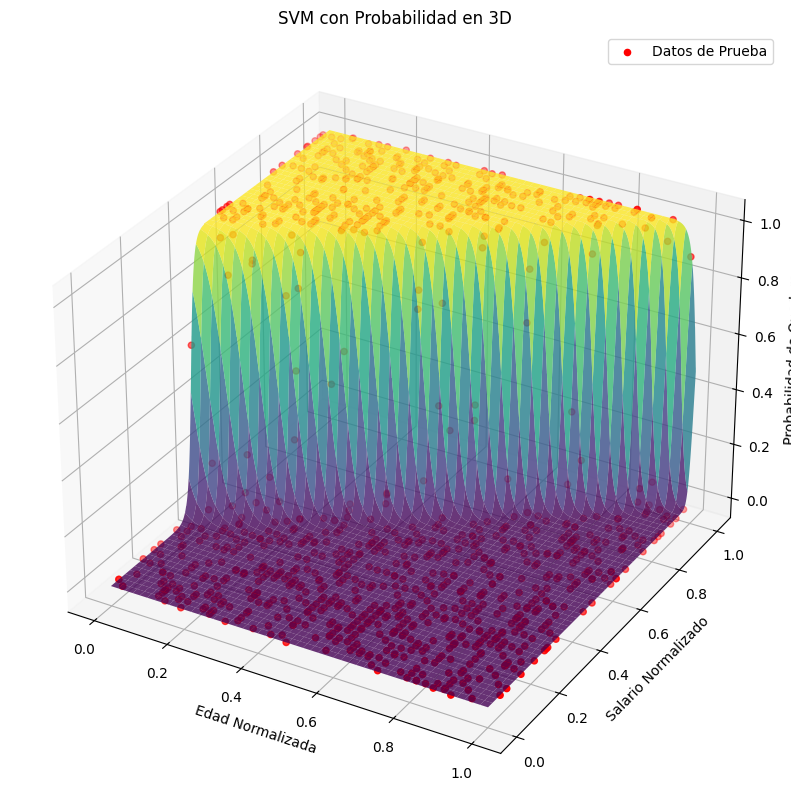

In [6]:
# Visualización en 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Crear malla para visualización
age_range = np.linspace(0, 1, 5000)
salary_range = np.linspace(0, 1, 5000)
age_grid, salary_grid = np.meshgrid(age_range, salary_range)
grid_points = np.c_[age_grid.ravel(), salary_grid.ravel()]

# Generar predicciones sobre la malla
grid_poly = poly.transform(grid_points)
grid_prob = model.predict_proba(grid_poly)[:, 1]
grid_prob = grid_prob.reshape(age_grid.shape)

# Graficar superficie
ax.plot_surface(age_grid, salary_grid, grid_prob, cmap = 'viridis', alpha = 0.8)
ax.scatter(X_test['Age_Normalized'], X_test['Salary_Normalized'], Y_prob, color='r', label='Datos de Prueba')

# Configurar etiquetas y título
ax.set_xlabel('Edad Normalizada')
ax.set_ylabel('Salario Normalizado')
ax.set_zlabel('Probabilidad de Quedarse')
ax.set_title('SVM con Probabilidad en 3D')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

# Guardar en Excel

In [7]:
# Crear un DataFrame con los resultados
results_df = X_test.copy()
results_df['Stay_Probability_Predicted'] = (Y_prob > 0.5).astype(int)
results_df['Probability'] = Y_prob

# Añadir la columna de categorización
results_df['Categorization'] = np.where(results_df['Stay_Probability_Predicted'] == 1, 'Sí', 'No')

# Guardar los resultados en un archivo Excel
results_df.to_excel('svm_results.xlsx', index = False)

print("Resultados guardados en 'svm_results.xlsx'")

Resultados guardados en 'svm_results.xlsx'
